# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv('sample.env')
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\UFK96\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API_Key")

In [5]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [6]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

bitcoin_news_en["totalResults"]

11296

In [7]:
# Fetch the Ethereum news articles
eth_news_en = newsapi.get_everything(
    q="ethereum",
    language="en"
)

eth_news_en["totalResults"]

4551

In [9]:
article = bitcoin_news_en["articles"][0]

In [10]:
text = article["content"]
date = article["publishedAt"][:10]
sentiment = analyzer.polarity_scores(text)
sentiment

{'neg': 0.0, 'neu': 0.929, 'pos': 0.071, 'compound': 0.3818}

In [11]:
compound = sentiment["compound"]
pos = sentiment["pos"]
neu = sentiment["neu"]
neg = sentiment["neg"]

print(f'positive score: {pos}')
print(f'neutral score: {neu}')
print(f'negative score: {neg}')

positive score: 0.071
neutral score: 0.929
negative score: 0.0


In [13]:
# Create the Bitcoin sentiment scores DataFrame


btc_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)


# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942
2,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000
3,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829
4,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816


In [15]:
article = eth_news_en["articles"][0]

In [16]:
text = article["content"]
date = article["publishedAt"][:10]
sentiment = analyzer.polarity_scores(text)
sentiment

{'neg': 0.0, 'neu': 0.94, 'pos': 0.06, 'compound': 0.2263}

In [17]:
compound = sentiment["compound"]
pos = sentiment["pos"]
neu = sentiment["neu"]
neg = sentiment["neg"]

print(f'positive score: {pos}')
print(f'neutral score: {neu}')
print(f'negative score: {neg}')

positive score: 0.06
neutral score: 0.94
negative score: 0.0


In [18]:
# Create the Ethereum sentiment scores DataFrame

eth_sentiments = []

for article in eth_news_en["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)


# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940
1,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829
3,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.00,0.966
4,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917


In [19]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.00000,20.000000,20.000000,20.000000
mean,0.30198,0.084100,0.021350,0.894650
std,0.38373,0.073353,0.045178,0.081725
min,-0.76270,0.000000,0.000000,0.777000
25%,0.00000,0.000000,0.000000,0.824750
50%,0.34295,0.071000,0.000000,0.892000
75%,0.54550,0.159000,0.012500,0.974500
max,0.84550,0.217000,0.180000,1.000000


In [20]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.128900,0.046800,0.011200,0.942000
std,0.304466,0.059529,0.036611,0.070125
min,-0.401900,0.000000,0.000000,0.778000
25%,0.000000,0.000000,0.000000,0.917750
50%,0.012900,0.036000,0.000000,0.958000
75%,0.254725,0.074500,0.000000,1.000000
max,0.817600,0.210000,0.150000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the higher mean positiive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest max compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest max positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [22]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [25]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))

# Expand the default stopwords list if necessary


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [48]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
        
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    
     # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    
    return tokens



In [49]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,Just weeks after Tesla started accepting Bitco...,0.3818,0.071,0.00,0.929,"[week, tesla, started, accepting, bitcoin, cur..."
1,2021-05-07,Shares of Square are up more than 6% today aft...,0.2960,0.058,0.00,0.942,"[shares, square, today, american, fintech, com..."
2,2021-04-27,Tesla’s relationship with bitcoin is not a dal...,0.0000,0.000,0.00,1.000,"[teslas, relationship, bitcoin, dalliance, acc..."
3,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
4,2021-05-12,Image: Tesla\r\n\n \n\n Tesla has stopped acce...,0.4939,0.134,0.05,0.816,"[image, tesla, tesla, ha, stopped, accepting, ..."


In [50]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-05-12,"Vitalik Buterin, the creator of Ethereum, on W...",0.2263,0.060,0.00,0.940,"[vitalik, buterin, creator, ethereum, wednesda..."
1,2021-05-04,Their investors call them disruptive innovator...,-0.4019,0.072,0.15,0.778,"[investor, call, disruptive, innovator, detrac..."
2,2021-04-20,Cryptocurrency continues to gain mainstream ac...,0.7506,0.171,0.00,0.829,"[cryptocurrency, continues, gain, mainstream, ..."
3,2021-04-20,Venmo is jumping aboard the cryptocurrency ban...,0.0258,0.034,0.00,0.966,"[venmo, jumping, aboard, cryptocurrency, bandw..."
4,2021-05-15,Solana isn’t known yet outside of the crypto c...,0.4019,0.083,0.00,0.917,"[solana, isnt, known, yet, outside, crypto, co..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [51]:
from collections import Counter
from nltk import ngrams

In [52]:
# Generate the Bitcoin N-grams where N=2
btc_all_text = []
for token in btc_df['tokens']:
    for text in token:
        btc_all_text.append(text)
btc_bigram_counter = Counter(ngrams(btc_all_text, n=2))
print(dict(btc_bigram_counter.most_common(10)))

{('elon', 'musk'): 5, ('accepting', 'bitcoin'): 3, ('char', 'cryptocurrency'): 2, ('char', 'image'): 2, ('tesla', 'ha'): 2, ('ceo', 'elon'): 2, ('price', 'continued'): 2, ('outage', 'morning'): 2, ('week', 'tesla'): 1, ('tesla', 'started'): 1}


In [53]:
# Generate the Ethereum N-grams where N=2
eth_all_text = []
for token in eth_df['tokens']:
    for text in token:
        eth_all_text.append(text)
eth_bigram_counter = Counter(ngrams(eth_all_text, n=2))
print(dict(eth_bigram_counter.most_common(10)))

{('char', 'reuters'): 4, ('representation', 'virtual'): 4, ('virtual', 'currency'): 4, ('currency', 'ethereum'): 4, ('ethereum', 'seen'): 4, ('seen', 'front'): 4, ('front', 'stock'): 4, ('stock', 'graph'): 4, ('graph', 'illustration'): 4, ('illustration', 'taken'): 4}


In [57]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [58]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_all_text)

[('char', 20),
 ('bitcoin', 10),
 ('tesla', 7),
 ('musk', 7),
 ('cryptocurrency', 7),
 ('ha', 6),
 ('elon', 5),
 ('company', 5),
 ('price', 4),
 ('accepting', 3)]

In [59]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_all_text)

[('char', 20),
 ('ethereum', 11),
 ('reuters', 7),
 ('currency', 7),
 ('cryptocurrency', 6),
 ('stock', 6),
 ('bitcoin', 5),
 ('ha', 4),
 ('project', 4),
 ('representation', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

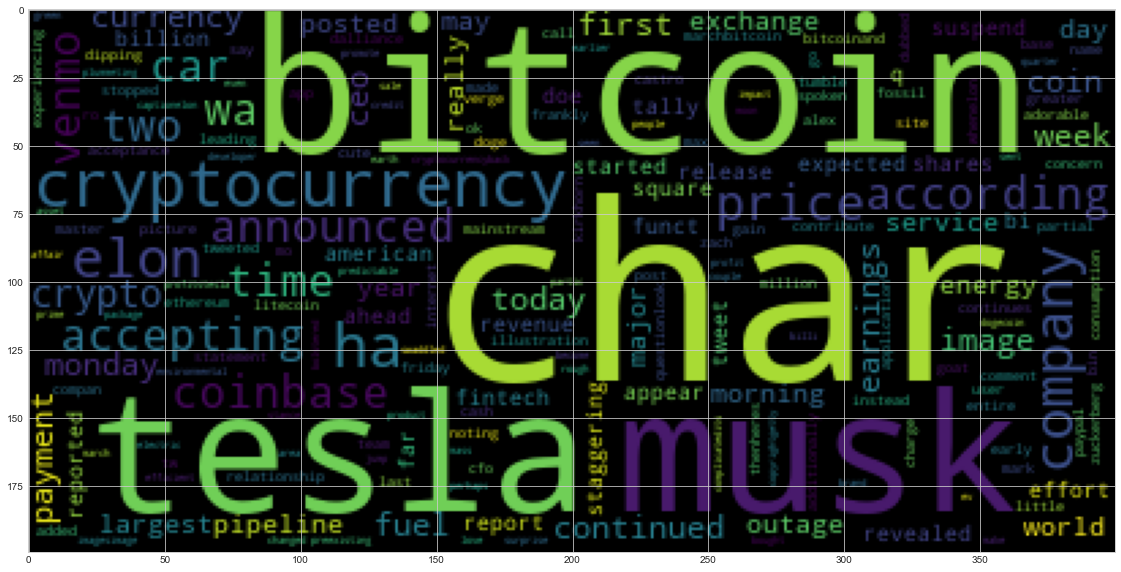

In [65]:
# Generate the Bitcoin word cloud
def processed_text(corpus): 
    big_string = ' '.join(corpus)
    return big_string

btc_words = processed_text(btc_all_text)
btc_wc = WordCloud(collocations=False).generate(btc_words)
fig = plt.figure()
plt.imshow(btc_wc)
plt.show()


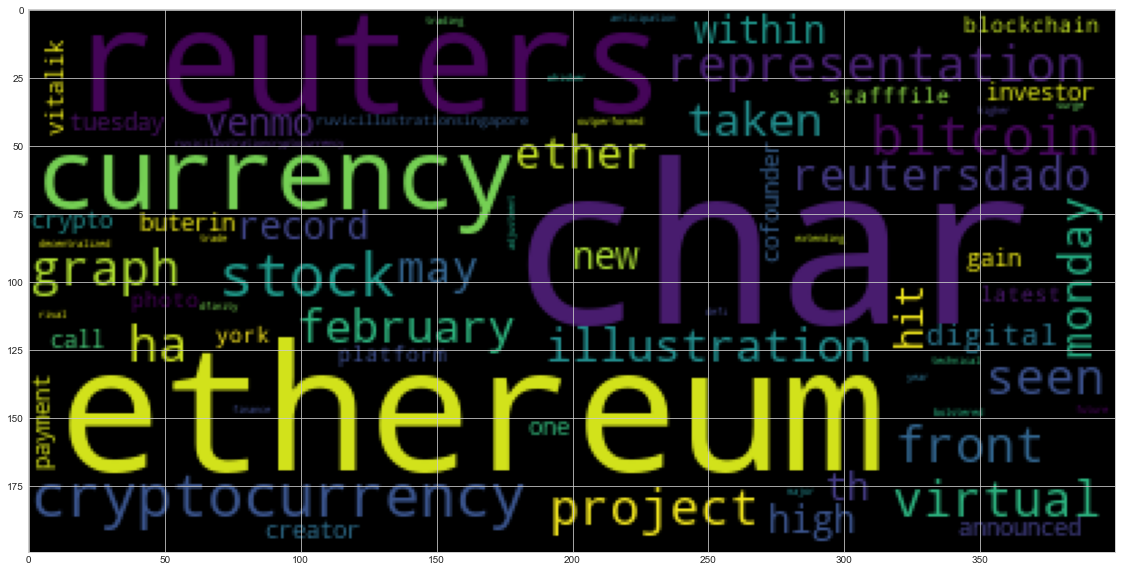

In [66]:
# Generate the Ethereum word cloud
eth_words = processed_text(eth_all_text)
eth_wc = WordCloud(collocations=False).generate(eth_words)
fig = plt.figure()
plt.imshow(eth_wc)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [67]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [68]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [69]:
# Concatenate all of the Bitcoin text together
btc_text = []

for text in btc_df['text']:
    text = text
    btc_text.append(text)
    
big_string_btc = ' '.join(btc_text)

In [70]:
# Run the NER processor on all of the text
btc_doc = nlp(big_string_btc)

# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin NER'

In [71]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [72]:
# List all Entities
for ent in btc_doc.ents:
    print (ent, ent.label_)

Just weeks DATE
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Tesla ORG
Elon Musk PERSON
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
Alex Castro PERSON
The Verge

 

 Cryptocurrency ORG
Coinbase PERSON
this morning TIME
Coinbase PERSON
Bin PERSON
Mark Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
Last week DATE
Musk PERSON
Dogecoin GPE
Elon Musk PERSON
March DATE
Musk PERSON
Tesla PERSON
Earlier this year DATE
EV ORG
1.5 MONEY
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
Elon Musk PERSON
Bitcoin PERSON
Bitcoin PERSON
] Earth Day EVENT
Jack Dorsey PERSON
Three years DATE
Babel Finance ORG
Monday DATE
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
hours-long TIME

---

### Ethereum NER

In [74]:
# Concatenate all of the Ethereum text together
eth_text = []

for text in eth_df['text']:
    text = text
    eth_text.append(text)
    
big_string_eth = ' '.join(eth_text)

In [75]:
# Run the NER processor on all of the text
eth_doc = nlp(big_string_eth)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER'

In [76]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [77]:
# List all Entities
for ent in eth_doc.ents:
    print (ent, ent.label_)

Vitalik Buterin PERSON
Ethereum ORG
Wednesday DATE
Ethereum ORG
$1.5 billion MONEY
Buterin PERSON
500 CARDINAL
ETH ORG
North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
Solana PERSON
Anatoly Yakovenko PERSON
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Reuters ORG
SINGAPORE GPE
May 3 DATE
Reuters ORG
Monday DATE
3,000 MONEY
last weeks DATE
Europe LOC
Dow Jone

---